# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **Importing Dataset**

In [ ]:
weather_df = pd.read_csv("/content/weather_conditions.csv")
roadcond_df = pd.read_csv("/content/road_conditions.csv")


# **Data Cleaning and Preprocessing**

In [ ]:
north_india = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Orissa']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

The code organizes Indian states and union territories into different geographical regions such as North, East, South, West, Central, and North East India, along with a category for Union Territories. Each state or territory is assigned to its respective region based on its geographical location. This classification provides a structured approach for analyzing and understanding the regional distribution of Indian states and territories.


In [ ]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north_india:
        val = 'North Zone'
    elif row['States/UTs'].strip()  in south_india:
        val = 'South Zone'
    elif row['States/UTs'].strip()  in east_india:
        val = 'East Zone'
    elif row['States/UTs'].strip()  in west_india:
        val = 'West Zone'
    elif row['States/UTs'].strip()  in central_india:
        val = 'Central Zone'
    elif row['States/UTs'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['States/UTs'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

This function categorizes Indian states and union territories into different geographical zones such as North, South, East, West, Central, North East, and Union Territories. It takes the name of a state or territory as input and returns the corresponding zone based on predefined lists.

In [ ]:
roadcond_df.drop(roadcond_df[roadcond_df['States/UTs'] == 'Total'].index, inplace=True)
roadcond_df['Zones'] = roadcond_df.apply(get_zonal_names, axis=1)
weather_df.drop(weather_df[weather_df['States/UTs'] == 'Total'].index, inplace=True)
weather_df['Zones'] = weather_df.apply(get_zonal_names, axis=1)

KeyError: 'States/UTs'

This code snippet removes any rows labeled 'Total' from two DataFrames (roadcond_df and weather_df). Then, it adds a new column called 'Zones' to each DataFrame, assigning geographical zones to each state or union territory based on predefined lists. This categorization helps organize the data for further analysis by region.







In [ ]:
total_col = [col for col in weather_df.columns if 'Total' in col]
killed_col = [col for col in weather_df.columns if 'Killed' in col]
injured_col = [col for col in weather_df.columns if 'Injured' in col]
weather_df_killed = weather_df.drop(columns = total_col+injured_col)
weather_df_injured = weather_df.drop(columns = total_col+killed_col)

total_col = [col for col in roadcond_df.columns if 'Accident' in col]
killed_col = [col for col in roadcond_df.columns if 'Killed' in col]
injured_col = [col for col in roadcond_df.columns if 'Injured' in col]
roadcond_df_killed = roadcond_df.drop(columns = total_col+injured_col)
roadcond_df_injured = roadcond_df.drop(columns = total_col+killed_col)

This code identifies and separates columns related to total accidents, killed, and injured persons from both the weather_df and roadcond_df DataFrames. It creates new DataFrames (weather_df_killed, weather_df_injured, roadcond_df_killed, and roadcond_df_injured) by removing the total and irrelevant columns, thus isolating the data specific to fatalities and injuries. This separation streamlines further analysis by focusing on key metrics related to accidents.

# **Missing Data Handling**

In [ ]:
# Handling Missing Data for weather condition dataset
# Check for missing values
missing_values = weather_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values
weather_df.fillna(method='ffill', inplace=True)

Missing Values:
 S. No.                                 0
State/ UT                              0
Fine - Total Acc. - 2014               1
Fine - Persons Killed - 2014           0
Fine - Persons Injured - 2014          1
                                      ..
Dust Storm - Persons Killed - 2016     0
Dust Storm - Persons Injured - 2016    0
Others - Total Accidents - 2016        0
Others - Persons Killed - 2016         0
Others - Persons Injured - 2016        0
Length: 65, dtype: int64


The output displays the missing values count for each column in the weather_df DataFrame before and after filling missing values. It first prints the initial count of missing values for each column. Then, after applying the forward fill (ffill) method to fill missing values, it prints the updated count of missing values for each column. This process helps identify and address missing data within the weather condition dataset by ensuring that missing values are appropriately handled before further analysis.

In [ ]:
# Handling Missing Data for weather condition dataset
# Check for missing values
missing_values = roadcond_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values
roadcond_df.fillna(method='ffill', inplace=True)

Missing Values:
 S. No.                                                  0
State/ UT                                               0
Surfaced Roads-Accident - 2014                          1
Surfaced Roads- Killed - 2014                           0
Surfaced Roads-Injured - 2014                           1
                                                       ..
Earthern Shoulder Edge Drop - Persons Killed - 2016     0
Earthern Shoulder Edge Drop - Persons Injured - 2016    0
Others - Number of Accidents - 2016                     0
Others - Persons Killed - 2016                          0
Others - Persons Injured - 2016                         0
Length: 98, dtype: int64


The output presents the count of missing values for each column in the roadcond_df DataFrame before and after applying forward fill (ffill) to fill missing values. Initially, it displays the number of missing values for each column. Then, after filling missing values, it prints the updated count of missing values for each column. This process helps identify and handle missing data within the road condition dataset by ensuring that missing values are adequately addressed for further analysis.

# **Descriptive Statistics**

In [ ]:
# Summary statistics for numerical variables
numerical_summary = weather_df.describe()
# Summary statistics for categorical variables
categorical_summary = weather_df.describe(include='object')
# Correlation matrix for numerical variables
correlation_matrix = weather_df.corr()
# Print the results
print("Summary statistics for numerical variables:")
print(numerical_summary)
print("\nSummary statistics for categorical variables:")
print(categorical_summary)
print("\nCorrelation matrix for numerical variables:")
print(correlation_matrix)

Summary statistics for numerical variables:
       Fine - Total Acc. - 2014  Fine - Persons Killed - 2014  \
count                 36.000000                     36.000000   
mean                8615.527778                   2325.750000   
std                13739.464721                   3100.793542   
min                    0.000000                      0.000000   
25%                  213.000000                     71.000000   
50%                 2949.500000                   1017.000000   
75%                11004.750000                   3348.250000   
max                55186.000000                  11099.000000   

       Fine - Persons Injured - 2014  Mist/fog - Total Acc. - 2014  \
count                      36.000000                     36.000000   
mean                     8686.277778                    474.722222   
std                     13691.813766                    617.389185   
min                         0.000000                      0.000000   
25%                 

<ipython-input-22-8980f591cf46>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather_df.corr()


**Summary of Numerical Variables:**

**Variability in Accident Counts and Casualties:**

The dataset contains numerical variables representing counts of accidents and associated casualties across different regions and weather conditions.
For example, the mean fine for total accidents in 2014 is approximately 8615.53, with a standard deviation of 13739.46, indicating significant variability in fines imposed.

Similarly, the mean number of persons injured in accidents for the same year is approximately 8686.28, with a standard deviation of 13691.81, suggesting considerable variation in the extent of injuries.

**Correlation Analysis of Accident Variables:**

Strong positive correlations exist between the total number of accidents and the number of persons killed or injured, indicating that regions with higher accident rates tend to have more casualties.
Specific weather conditions show correlations with certain types of accidents. For instance, there is a noticeable positive correlation between mist/fog and accidents, suggesting that such weather conditions might increase the likelihood of accidents occurring.
Understanding these correlations can help in identifying risk factors and implementing targeted interventions to reduce accidents and their associated casualties.

In [ ]:
# Summary statistics for numerical variables
numerical_summary = roadcond_df.describe()
# Summary statistics for categorical variables
categorical_summary = roadcond_df.describe(include='object')
# Correlation matrix for numerical variables
correlation_matrix = roadcond_df.corr()
# Print the results
print("Summary statistics for numerical variables:")
print(numerical_summary)
print("\nSummary statistics for categorical variables:")
print(categorical_summary)
print("\nCorrelation matrix for numerical variables:")
print(correlation_matrix)

Summary statistics for numerical variables:
       Surfaced Roads-Accident - 2014  Surfaced Roads- Killed - 2014  \
count                       36.000000                      36.000000   
mean                      9505.222222                    2665.388889   
std                      14031.892413                    3458.231202   
min                          0.000000                       0.000000   
25%                        243.750000                      60.500000   
50%                       3519.500000                    1026.000000   
75%                      10921.000000                    3845.000000   
max                      48820.000000                   11768.000000   

       Surfaced Roads-Injured - 2014  Metalled Roads-Accident - 2014  \
count                      36.000000                       36.000000   
mean                     9292.638889                     2356.972222   
std                     14052.709533                     3429.078373   
min                

<ipython-input-23-5c2ccd13b1fb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = roadcond_df.corr()


**Overview of Summary Statistics**

**Numerical Variables:**

The summary statistics paint a detailed picture of road accidents in 2014 across different road types. With mean accident counts ranging from 9505.22 on surfaced roads to 1493.81 on kutcha roads, we witness substantial variation in accident frequencies. The standard deviations, ranging from 14031.89 on surfaced roads to 2286.31 on kutcha roads, signify the extent of dispersion around the mean, indicating diverse risk levels. For instance, surfaced roads exhibit a wider dispersion compared to kutcha roads, suggesting higher variability in accident occurrences.

**Quantity Distribution:**

Examining the quantity distribution further elucidates the severity of accidents. While the mean number of accidents provides a central tendency, understanding the distribution's shape is crucial. For instance, kutcha roads display a lower mean accident count, but the distribution may exhibit a longer tail of high-impact accidents, indicating potentially severe outcomes. Conversely, surfaced roads, despite having a higher mean accident count, may exhibit a more balanced distribution, suggesting a mix of low and high-impact accidents.

**Insights from Categorical Variables**

The categorical data reveals geographical nuances in road accident occurrences. Each of the 36 observations corresponds to a unique state or union territory, facilitating regional comparisons. The presence of seven distinct zones showcases geographical diversity, with the North-East zone being the most prevalent. This distribution allows for targeted analyses, enabling policymakers to identify high-risk regions and tailor interventions accordingly.

**Correlation Analysis for Road Accidents**

Delving into the correlation matrix unveils intricate relationships between different variables. Strong positive correlations, such as between surfaced roads and metalled roads accidents (0.82), imply shared influencing factors. Similarly, correlations between accident counts and casualties provide insights into accident severity. For example, a correlation of 0.96 between surfaced road accidents and injuries underscores the severity of accidents on these roads.


# **Outlier Detection**

In [ ]:
# Outlier Detection for weather condition
# Identify outliers using z-score
z_scores = np.abs(stats.zscore(weather_df.select_dtypes(include=np.number)))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove outliers
cleaned_data = weather_df[(z_scores < threshold).all(axis=1)]


In [ ]:
# Outlier Detection for road condition
# Identify outliers using z-score
z_scores = np.abs(stats.zscore(roadcond_df.select_dtypes(include=np.number)))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove outliers
cleaned_data = roadcond_df[(z_scores < threshold).all(axis=1)]

# **Data Visualization**

In [ ]:
# Weather Conditions - No. of People Killed in Road Accidents (South Zone)
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Southern Zone No. of People Killed in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

TypeError: '<' not supported between instances of 'str' and 'int'

<ipython-input-31-83b5a6903bed>:2: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


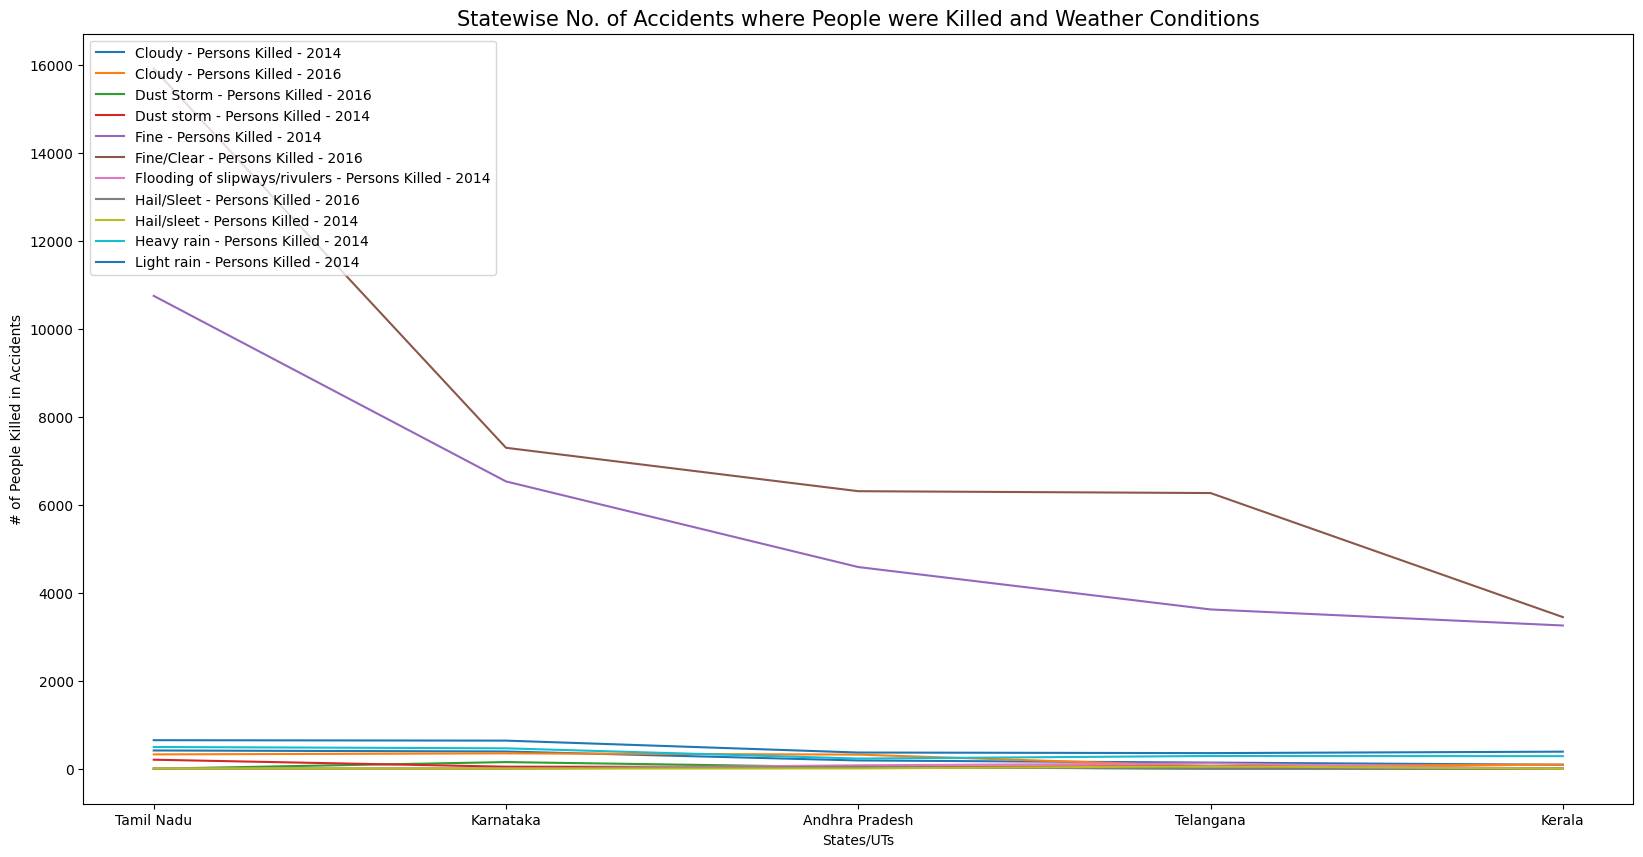

In [ ]:
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

<ipython-input-32-0ae31b2ddd51>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Fine/Clear - Persons Injured - 2016'),
  Text(1, 0, 'Fine - Persons Injured - 2014'),
  Text(2, 0, 'Other extraordinary weather condition - Persons Injured - 2014'),
  Text(3, 0, 'Others - Persons Injured - 2016'),
  Text(4, 0, 'Rainy - Persons Injured - 2016'),
  Text(5, 0, 'Light rain - Persons Injured - 2014'),
  Text(6, 0, 'Very hot - Persons Injured - 2014'),
  Text(7, 0, 'Heavy rain - Persons Injured - 2014'),
  Text(8, 0, 'Cloudy - Persons Injured - 2014'),
  Text(9, 0, 'Cloudy - Persons Injured - 2016')])

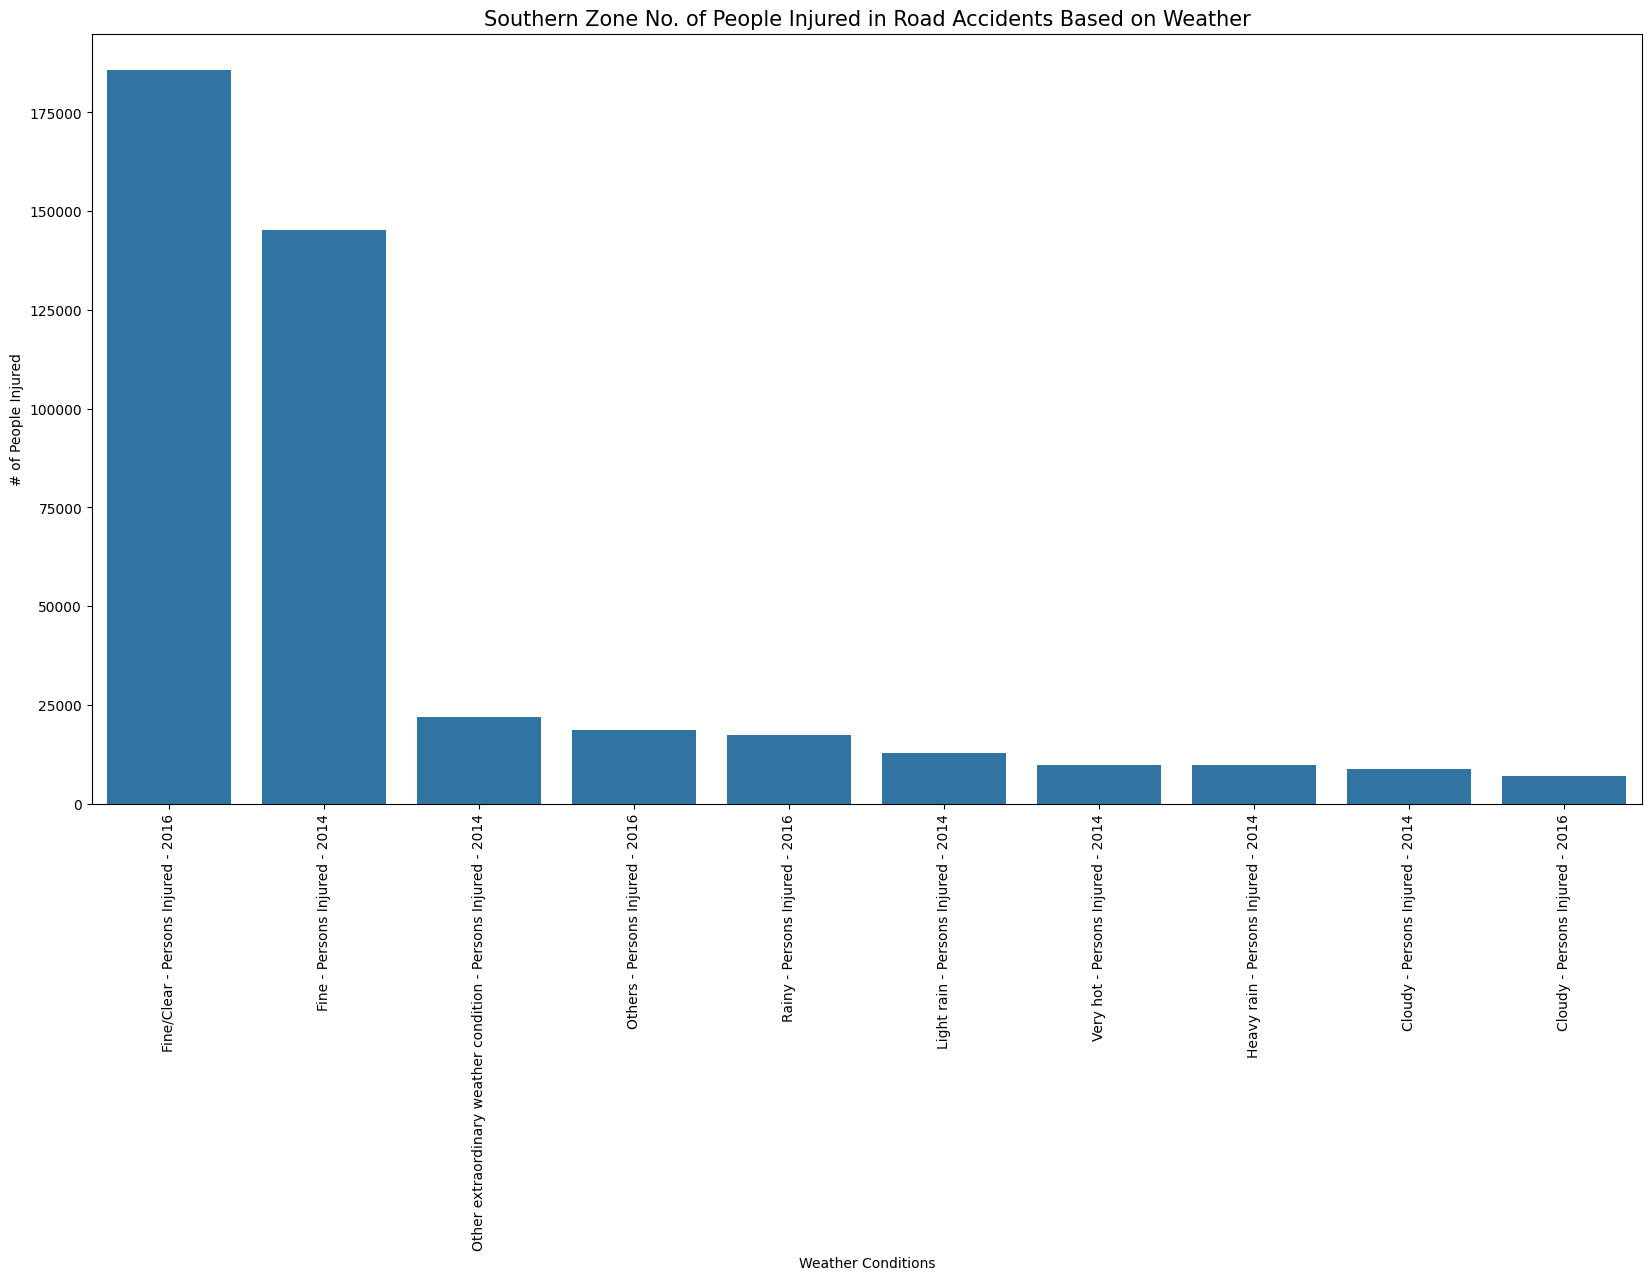

In [ ]:
# Weather Conditions - No. of People Injured in Road Accidents (South Zone)
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Southern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)


<ipython-input-33-fa66aff1e6f2>:2: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


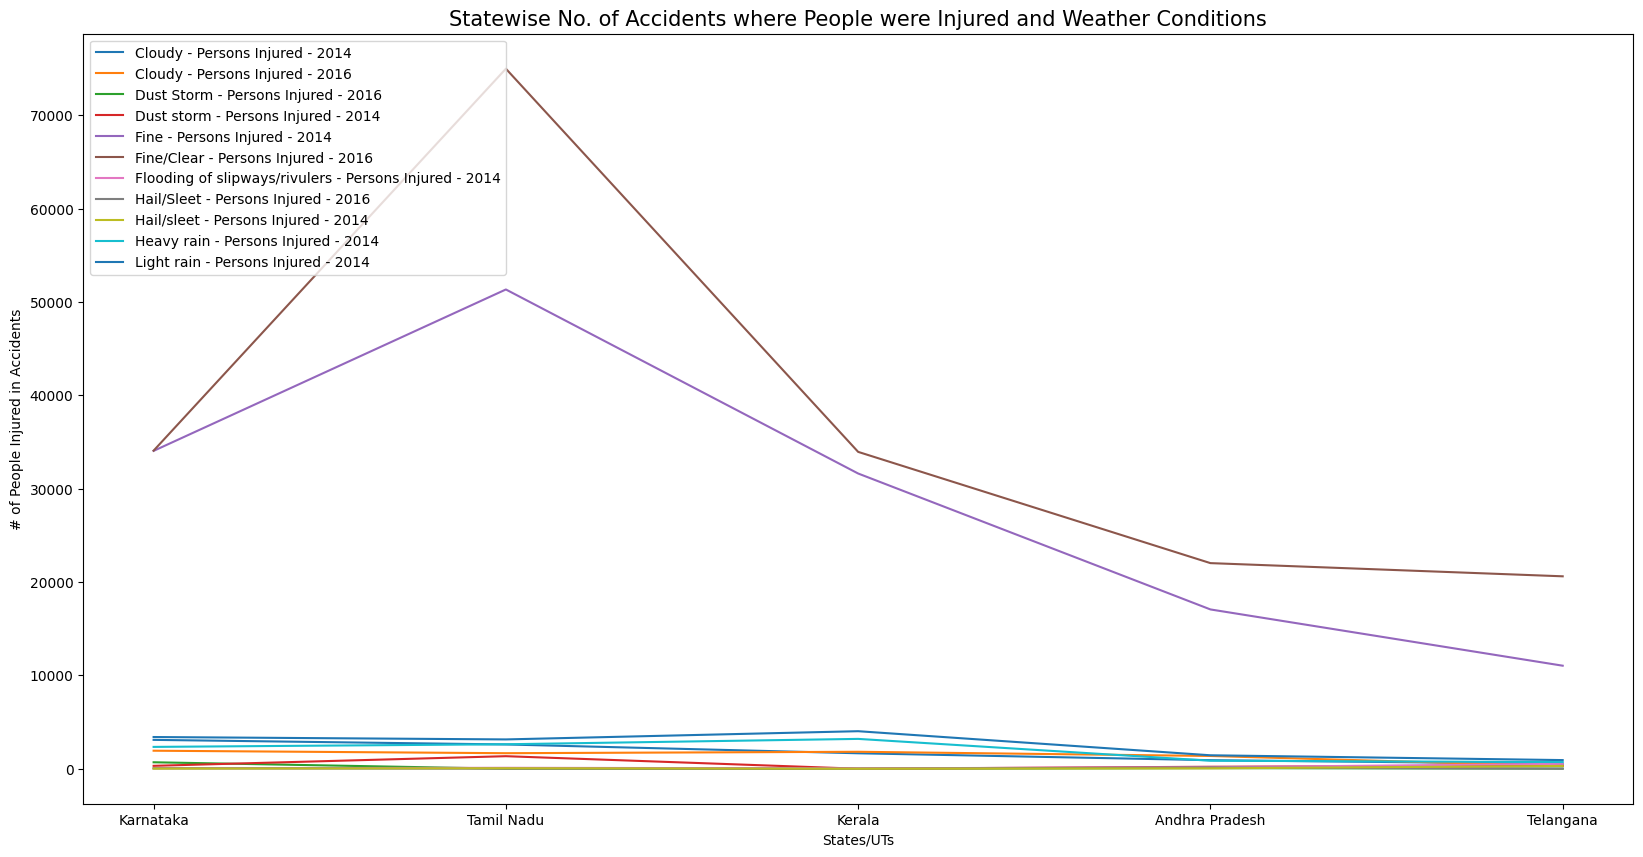

In [ ]:
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

<ipython-input-34-a25bff34aa25>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


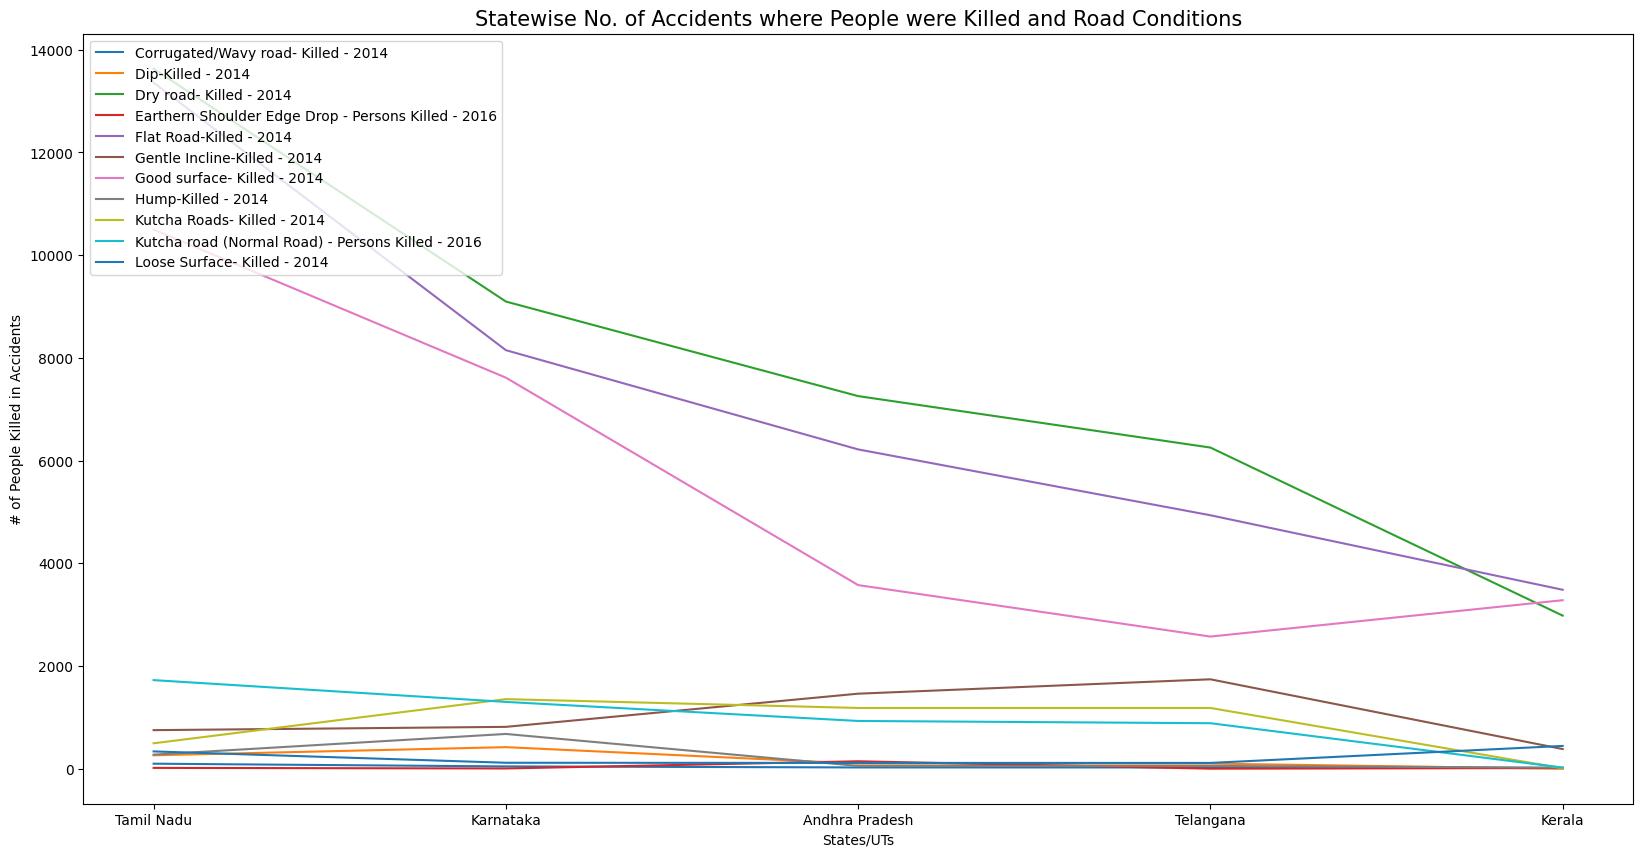

In [ ]:
# Road Conditions - No. of People Killed in Road Accidents (South Zone)
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

<ipython-input-35-d0ee0b08ef8d>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dry road-Injured - 2014'),
  Text(1, 0, 'Flat Road-Injured - 2014'),
  Text(2, 0, 'Pucca road (Normal Road) - Persons Injured - 2016'),
  Text(3, 0, 'Straight Road-Injured - 2014'),
  Text(4, 0, 'Surfaced Roads-Injured - 2014'),
  Text(5, 0, 'Good surface-Injured - 2014'),
  Text(6, 0, 'Others-Injured - 2014'),
  Text(7, 0, 'Metalled Roads-Injured - 2014'),
  Text(8, 0, 'Slight Curve-Injured - 2014'),
  Text(9, 0, 'Gentle Incline-Injured - 2014')])

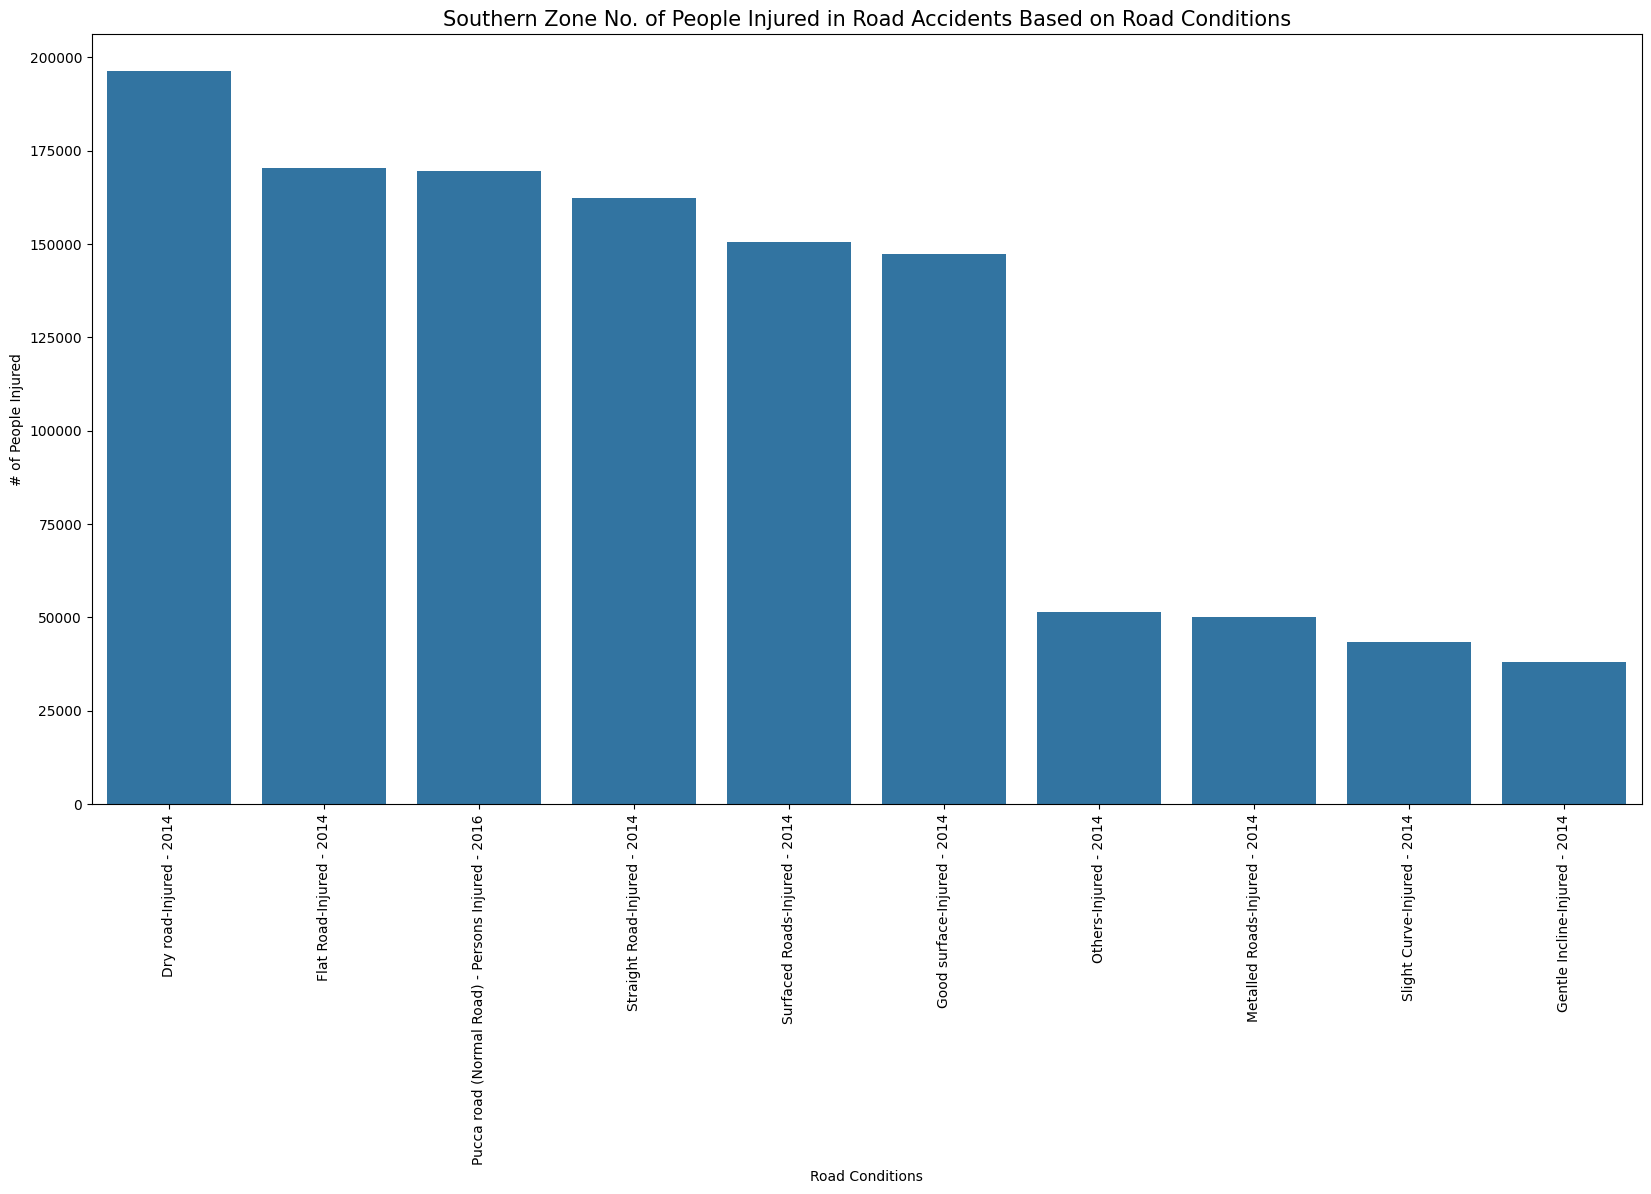

In [ ]:
# Road Conditions - No. of People Injured in Road Accidents (South Zone)
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Southern Zone No. of People Injured in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)


<ipython-input-36-62357dd78f13>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Fine/Clear - Persons Killed - 2016'),
  Text(1, 0, 'Fine - Persons Killed - 2014'),
  Text(2, 0, 'Others - Persons Killed - 2016'),
  Text(3, 0, 'Other extraordinary weather condition - Persons Killed - 2014'),
  Text(4, 0, 'Mist/ Foggy - Persons Killed - 2016'),
  Text(5, 0, 'Rainy - Persons Killed - 2016'),
  Text(6, 0, 'Cloudy - Persons Killed - 2016'),
  Text(7, 0, 'Mist/fog - Persons Killed - 2014'),
  Text(8, 0, 'Light rain - Persons Killed - 2014'),
  Text(9, 0, 'Very cold - Persons Killed - 2014')])

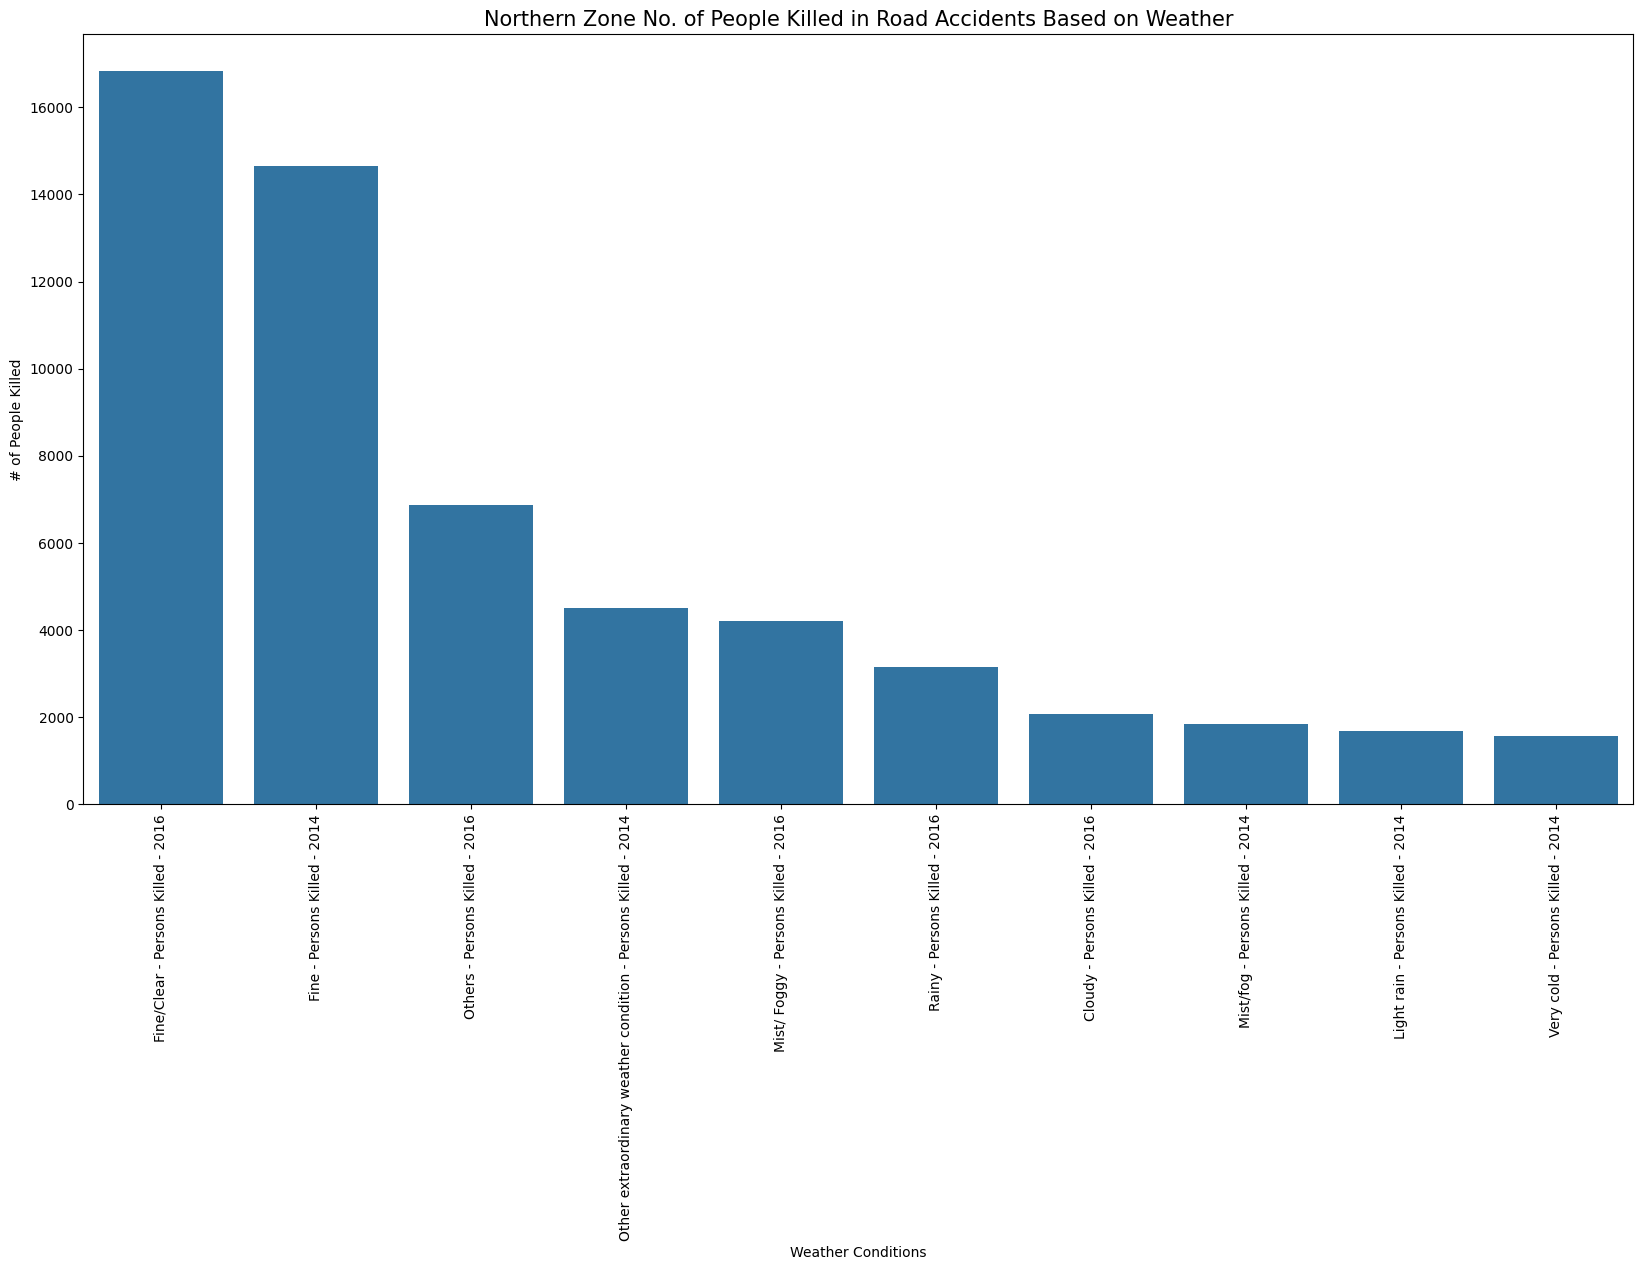

In [ ]:
# Weather Conditions - No. of People Killed in Road Accidents (North Zone)
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Northern Zone No. of People Killed in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

<ipython-input-37-932a4621a8ea>:2: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


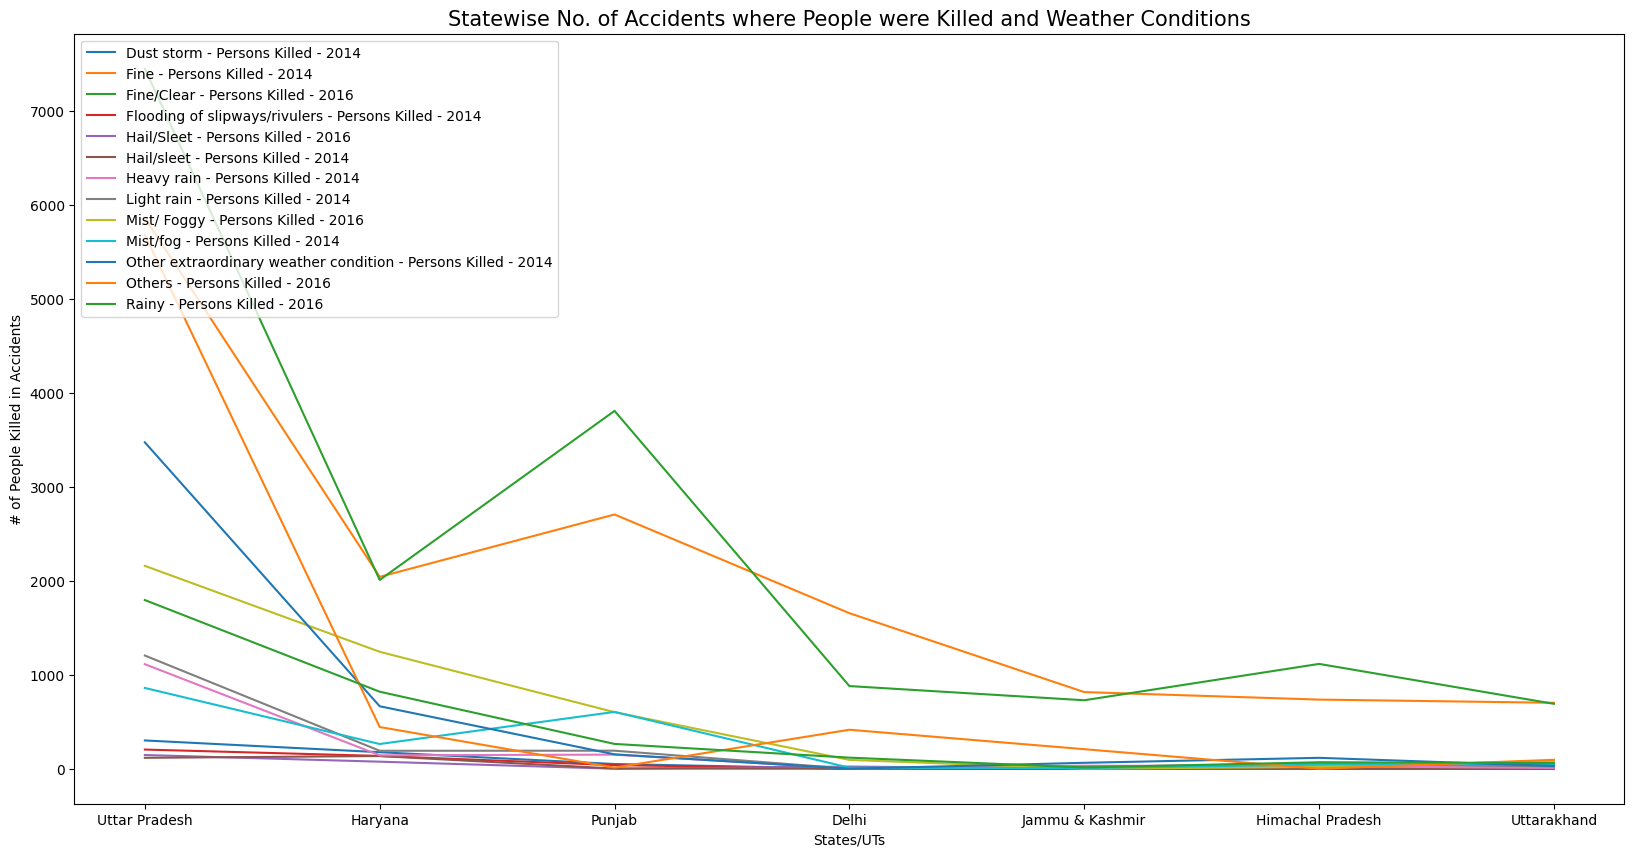

In [ ]:
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[5:18])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')


<ipython-input-38-cdcaffbfa91b>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Fine/Clear - Persons Injured - 2016'),
  Text(1, 0, 'Fine - Persons Injured - 2014'),
  Text(2, 0, 'Others - Persons Injured - 2016'),
  Text(3, 0, 'Other extraordinary weather condition - Persons Injured - 2014'),
  Text(4, 0, 'Mist/ Foggy - Persons Injured - 2016'),
  Text(5, 0, 'Rainy - Persons Injured - 2016'),
  Text(6, 0, 'Cloudy - Persons Injured - 2016'),
  Text(7, 0, 'Light rain - Persons Injured - 2014'),
  Text(8, 0, 'Mist/fog - Persons Injured - 2014'),
  Text(9, 0, 'Very cold - Persons Injured - 2014')])

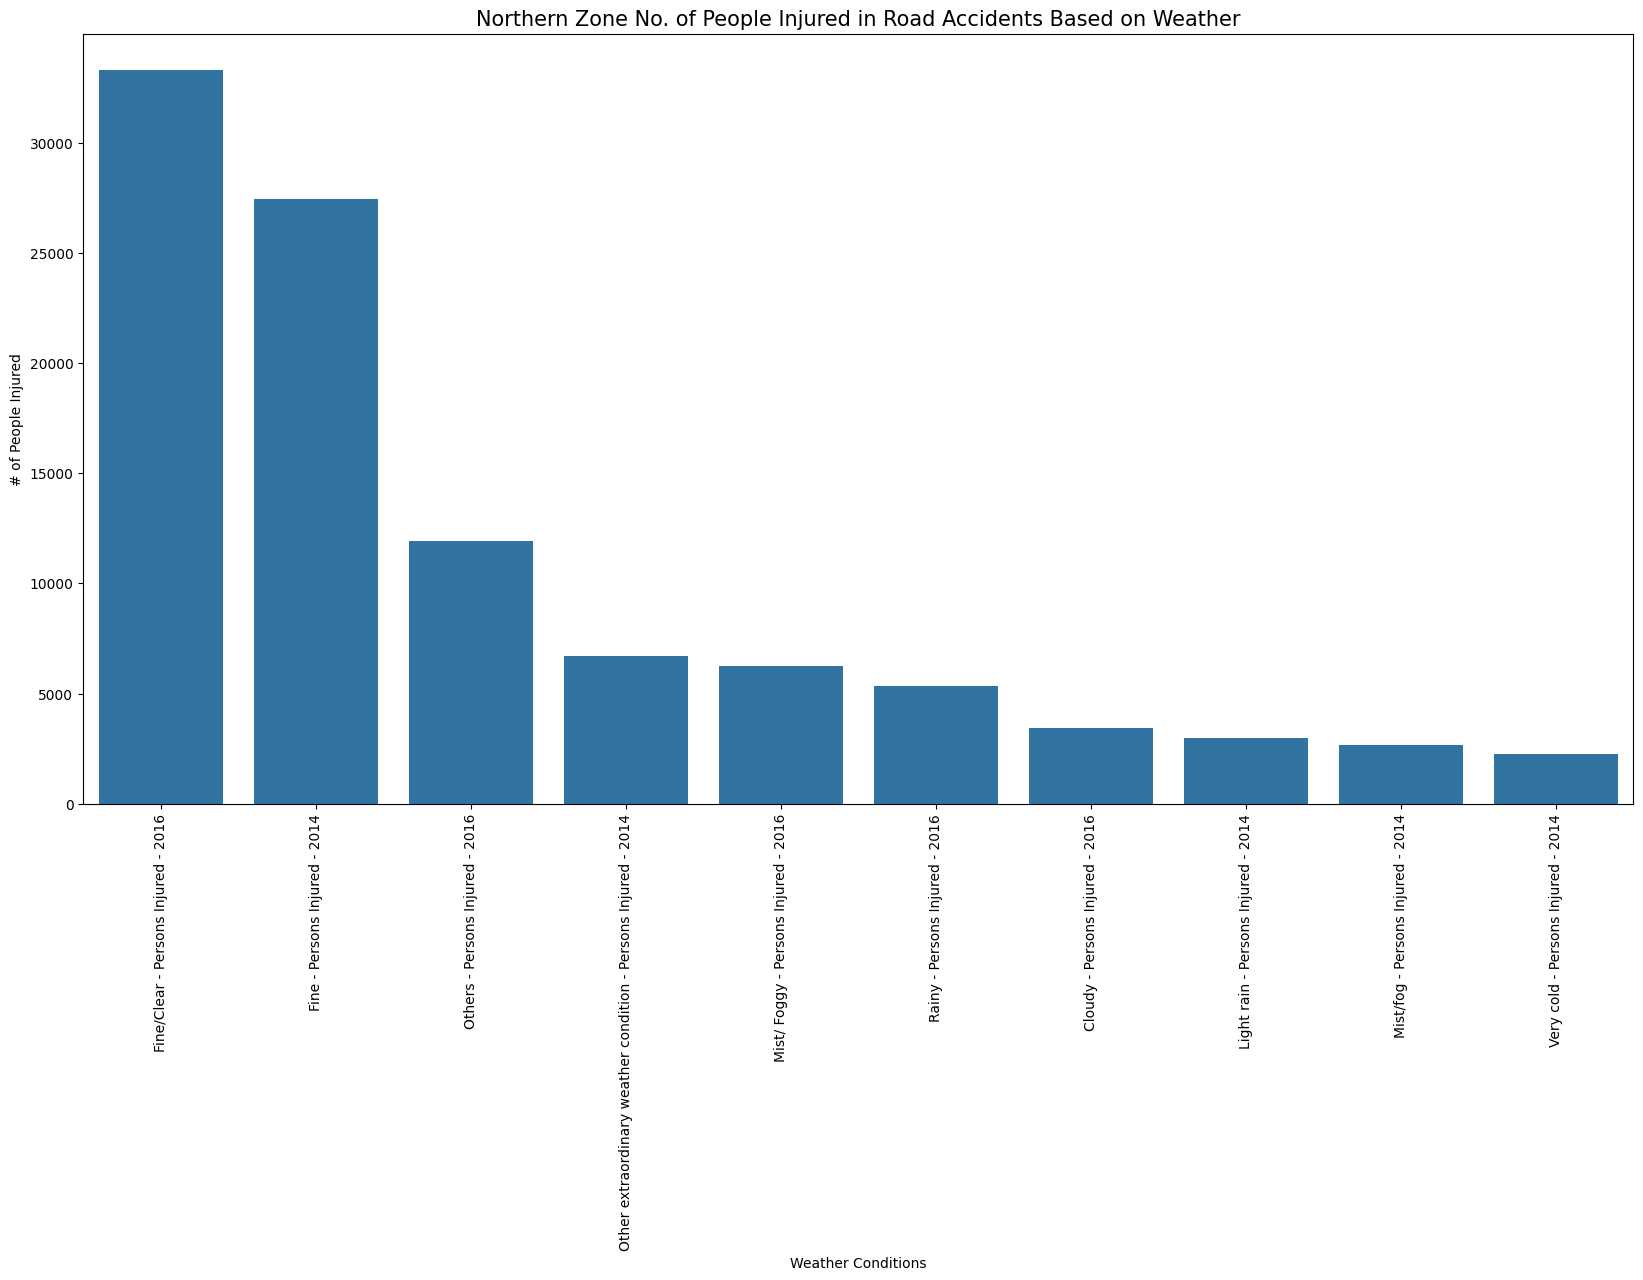

In [ ]:
# Weather Conditions - No. of People Injured in Road Accidents (North Zone)
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

<ipython-input-39-dca8f32dcad2>:2: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


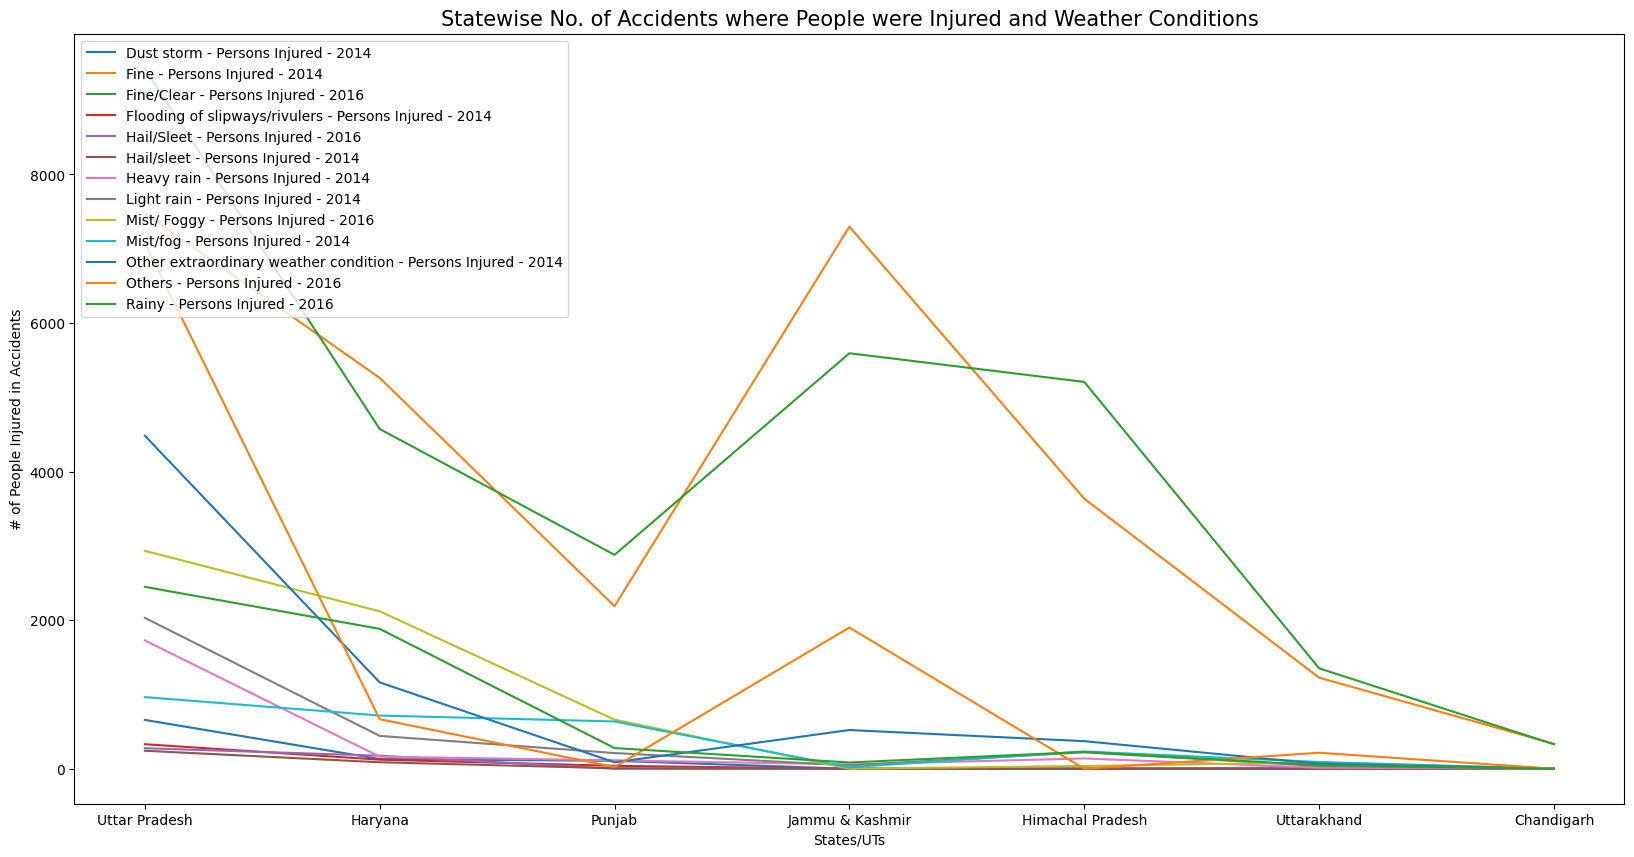

In [ ]:
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[5:18])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

<ipython-input-40-510f9bebc81e>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
<ipython-input-40-510f9bebc81e>:17: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


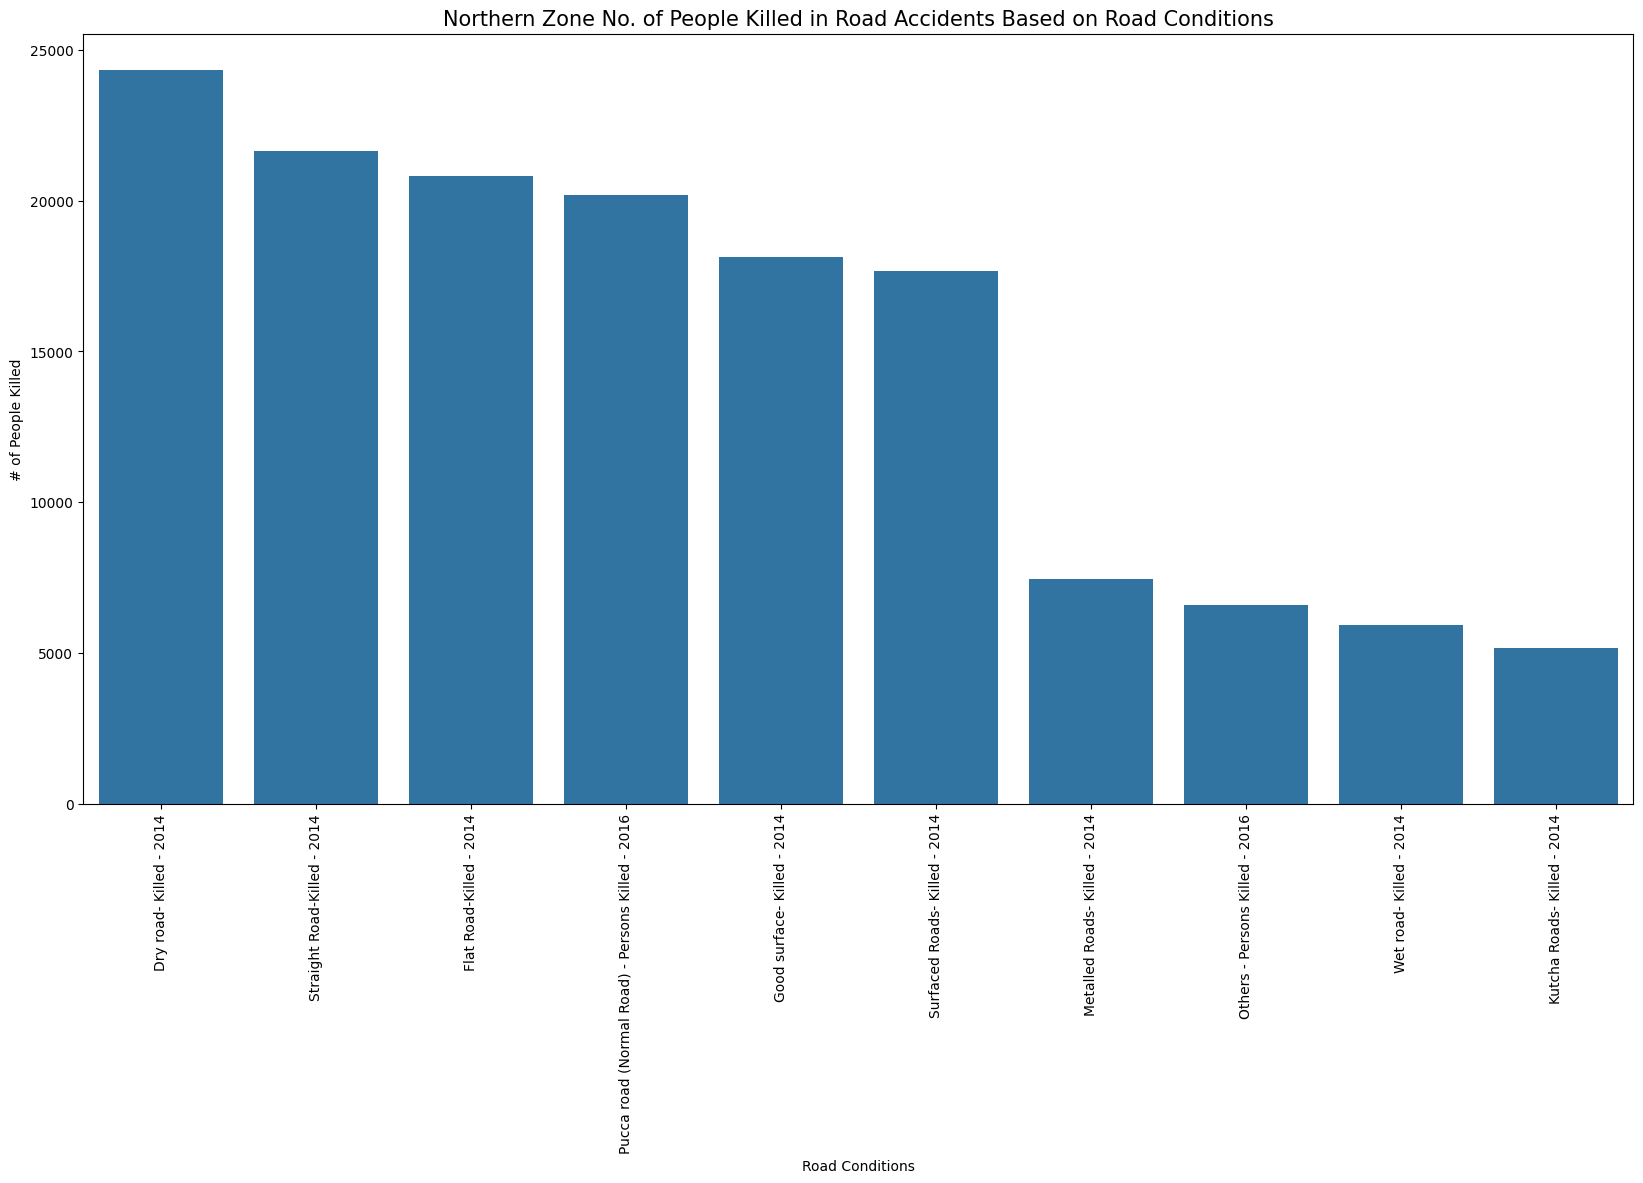

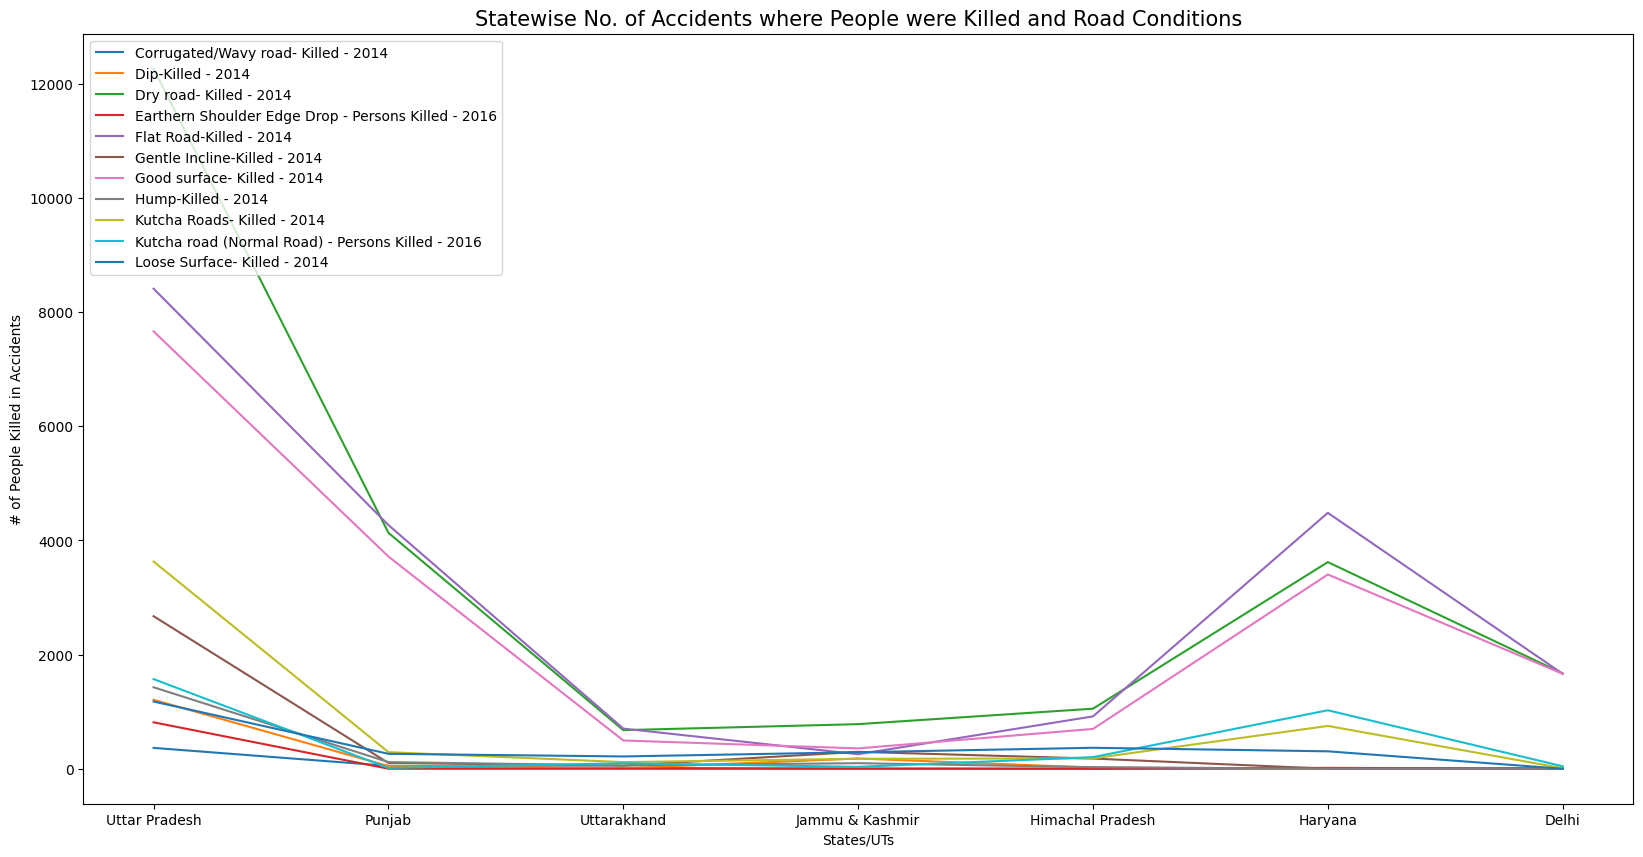

In [ ]:
# Road Conditions - No. of People Killed in Road Accidents (North Zone)
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Northern Zone No. of People Killed in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')


<ipython-input-41-813b736ee820>:3: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dry road-Injured - 2014'),
  Text(1, 0, 'Straight Road-Injured - 2014'),
  Text(2, 0, 'Pucca road (Normal Road) - Persons Injured - 2016'),
  Text(3, 0, 'Flat Road-Injured - 2014'),
  Text(4, 0, 'Good surface-Injured - 2014'),
  Text(5, 0, 'Surfaced Roads-Injured - 2014'),
  Text(6, 0, 'Others - Persons Injured - 2016'),
  Text(7, 0, 'Metalled Roads-Injured - 2014'),
  Text(8, 0, 'Wet road-Injured - 2014'),
  Text(9, 0, 'Kutcha Roads-Injured - 2014')])

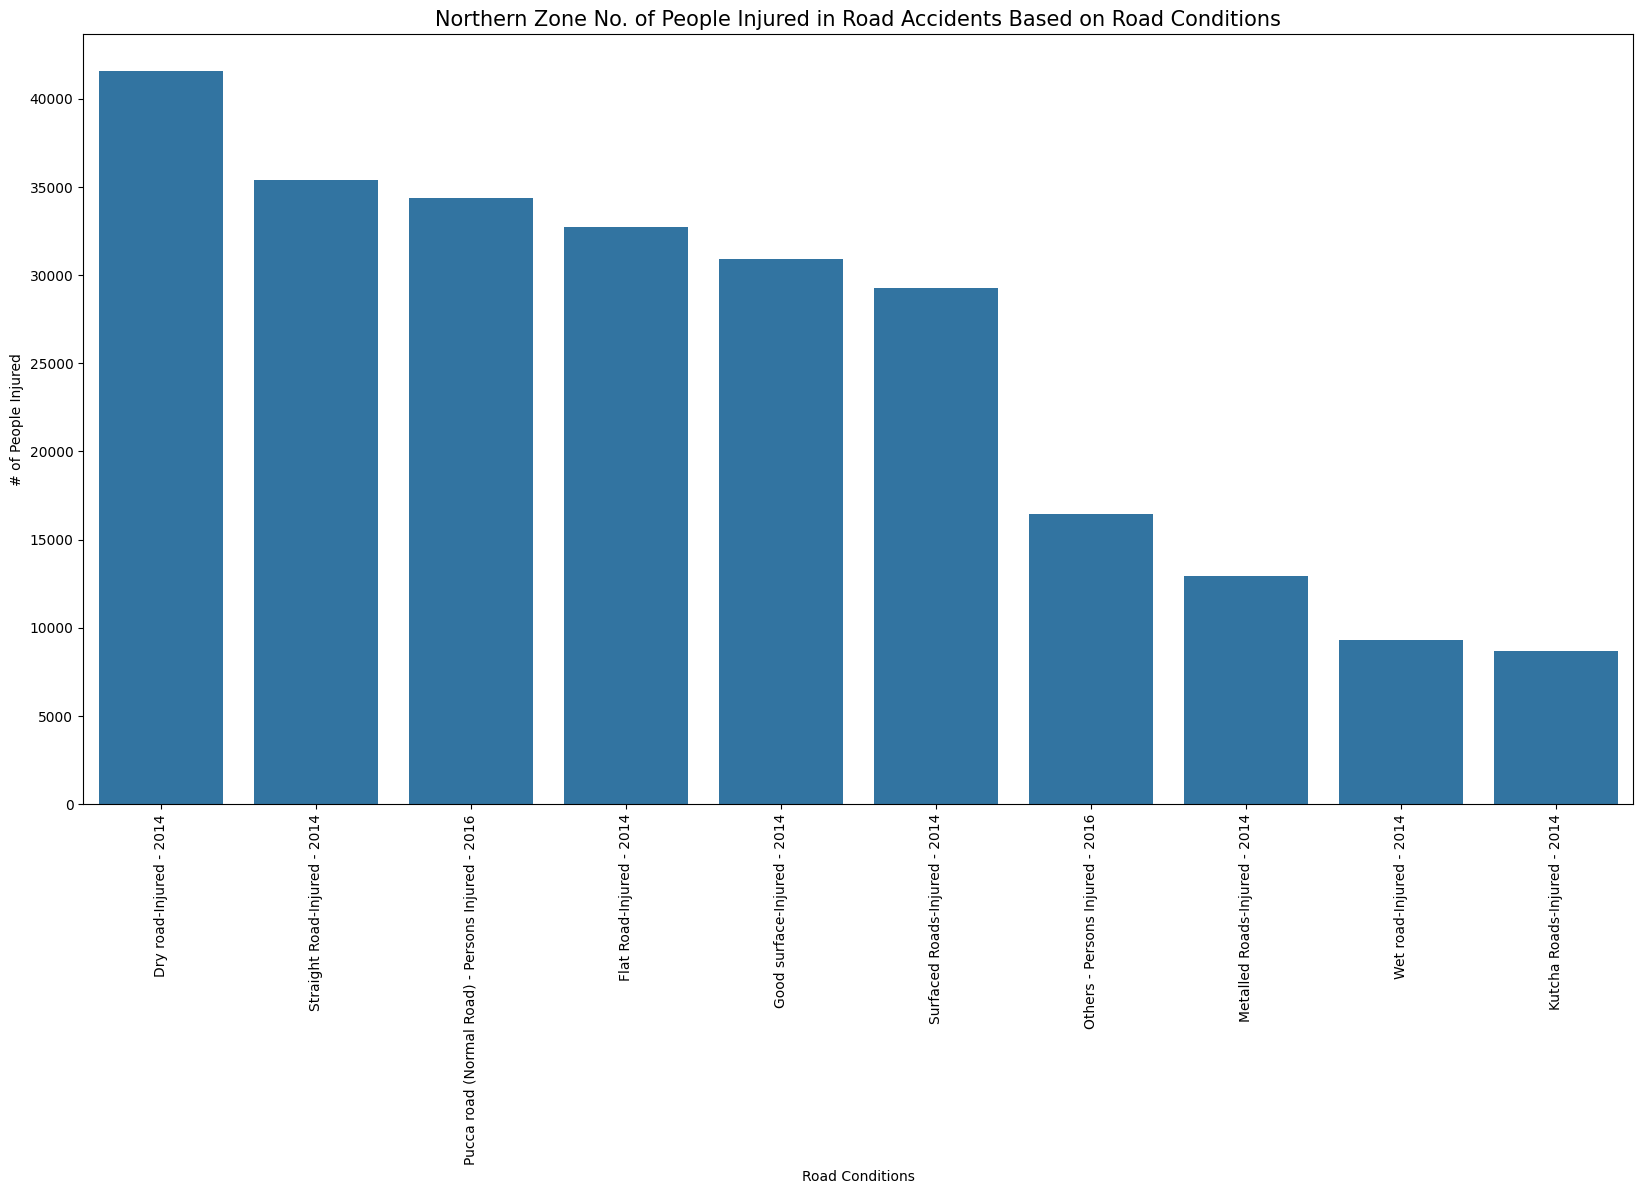

In [ ]:
# Road Conditions - No. of People Injured in Road Accidents (North Zone)
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

<ipython-input-42-3dfcabc7bf3e>:2: FutureWarning: The operation <function sum at 0x7a948b7820e0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()


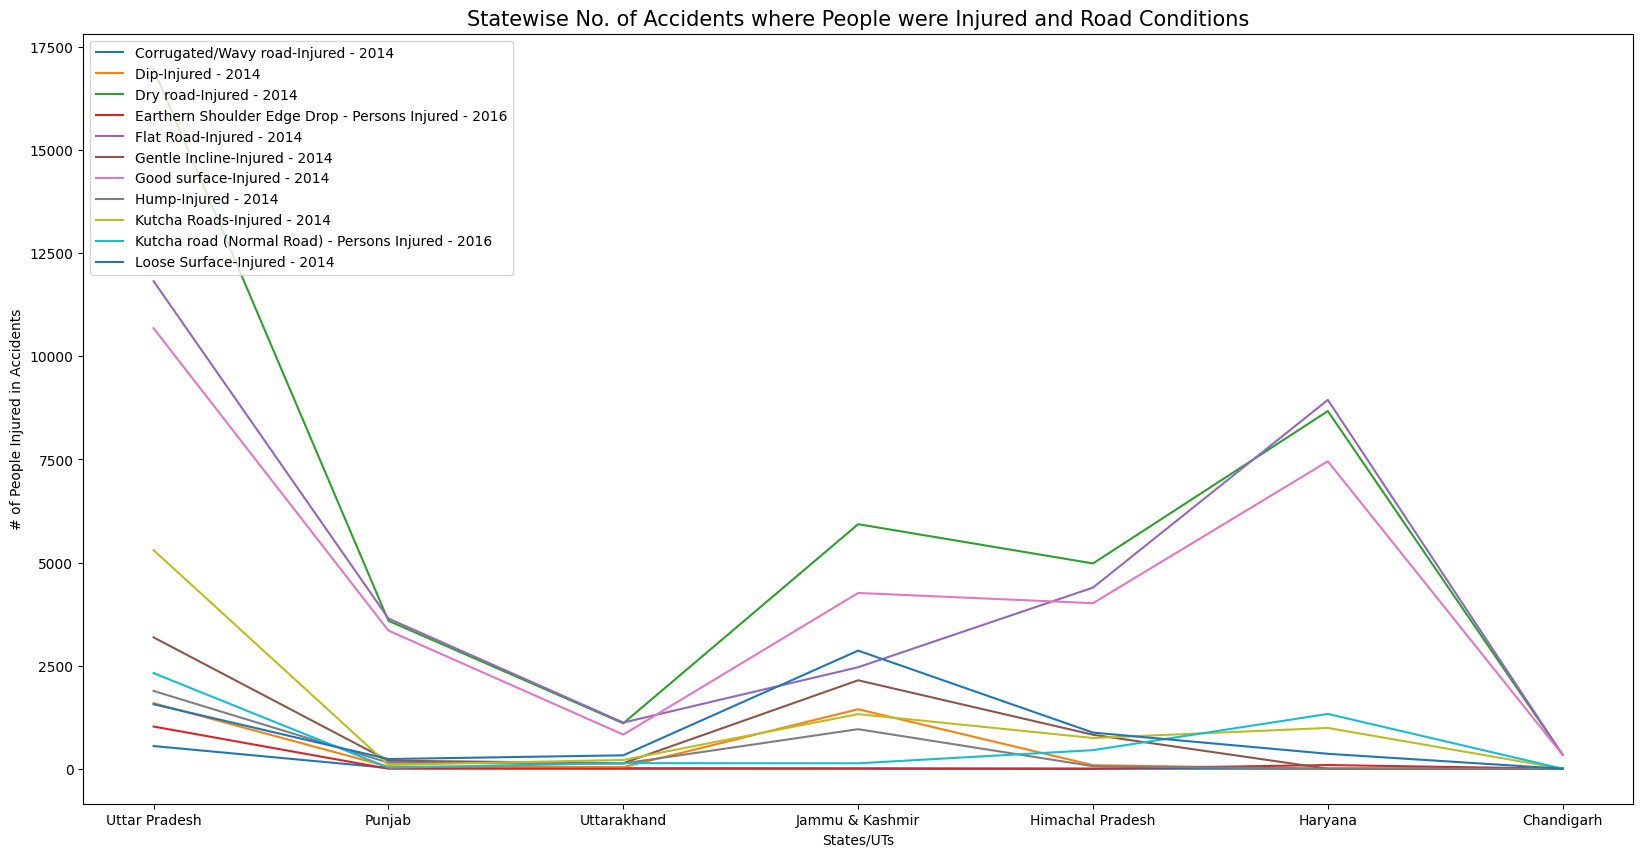

In [ ]:
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')




# **Skewness and Kurtosis**

In [ ]:
# Calculate skewness
skewness = weather_df.skew()
print("Skewness:")
print(skewness)

# Calculate kurtosis
kurtosis = roadcond_df.kurtosis()
print("\nKurtosis:")
print(kurtosis)

Skewness:
S. No.                                 0.000000
Fine - Total Acc. - 2014               2.051266
Fine - Persons Killed - 2014           1.606181
Fine - Persons Injured - 2014          1.840522
Mist/fog - Total Acc. - 2014           1.402353
                                         ...   
Dust Storm - Persons Killed - 2016     4.137431
Dust Storm - Persons Injured - 2016    2.135902
Others - Total Accidents - 2016        2.540133
Others - Persons Killed - 2016         3.769821
Others - Persons Injured - 2016        2.710401
Length: 64, dtype: float64

Kurtosis:
S. No.                                                  -1.200000
Surfaced Roads-Accident - 2014                           2.073593
Surfaced Roads- Killed - 2014                            0.731255
Surfaced Roads-Injured - 2014                            3.012936
Metalled Roads-Accident - 2014                           8.043181
                                                          ...    
Earthern Shoulder Edge Drop 

<ipython-input-44-0e0c8648e962>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = weather_df.skew()
<ipython-input-44-0e0c8648e962>:7: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = roadcond_df.kurtosis()


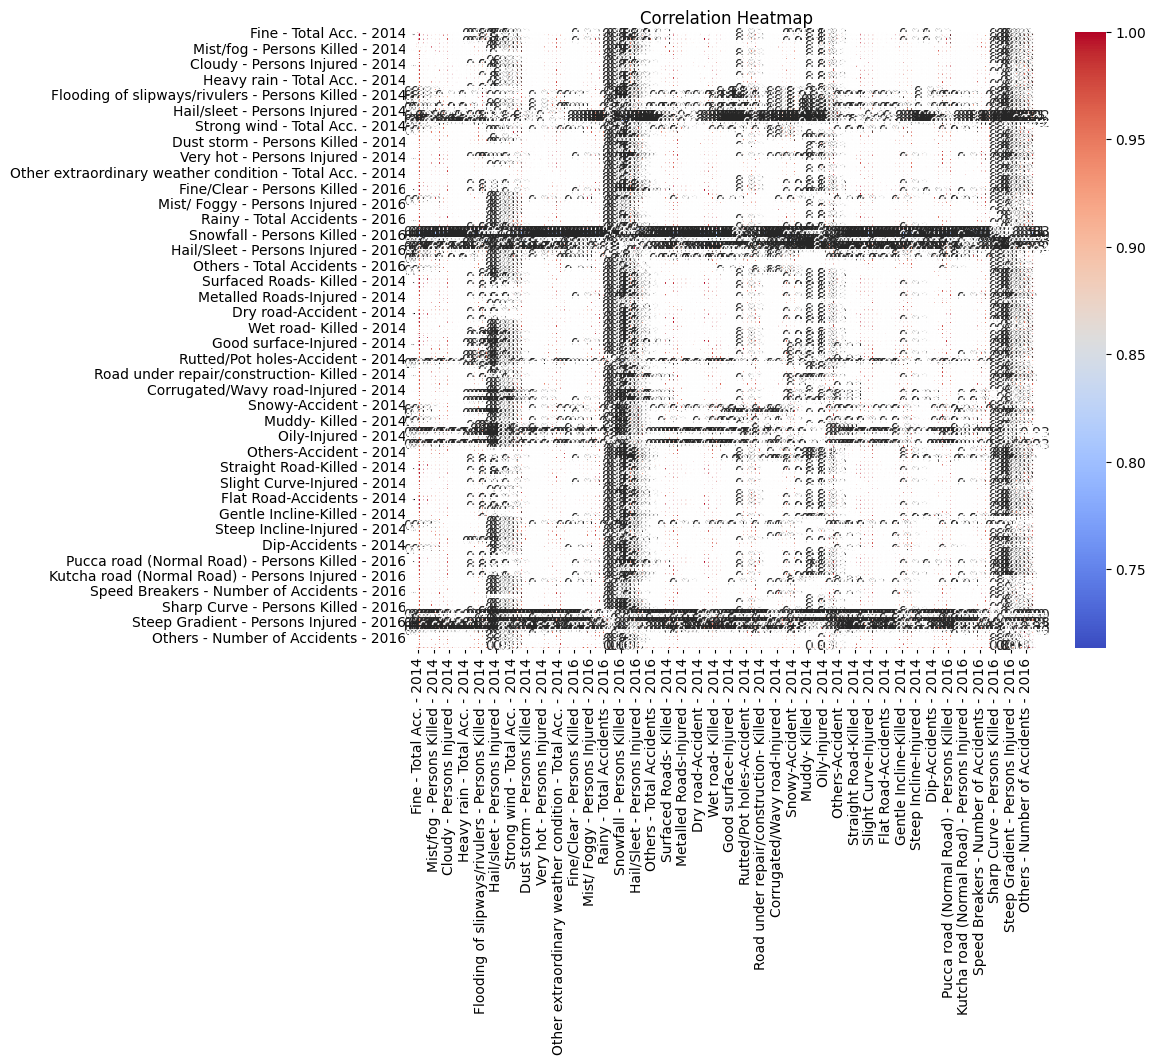

In [ ]:
numeric_combined_df = combined_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_combined_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Drop irrelevant columns (like 'S. No.' and 'State/UT' or 'Fine - Total Acc. - 2014') for feature selection
weather_data = weather_df .drop(columns=['Fine - Persons Killed - 2014'])

# Drop non-numeric columns (if any)
weather_numeric = weather_df .select_dtypes(include=np.number)

# Calculate correlation matrix
weather_corr_matrix = weather_numeric.corr()

# Get absolute correlation values with the target variable ('Fine/Clear - Total Accidents - 2016' for example)
corr_with_target_weather = abs(weather_corr_matrix['Fine - Persons Killed - 2014']).sort_values(ascending=False)

# Select top correlated features (excluding the target variable itself)
selected_features_weather = corr_with_target_weather[1:].index.tolist()  # Exclude the target variable

# Further Feature Selection based on selected features
X_weather = weather_data[selected_features_weather]
y_weather = weather_data['Fine - Persons Killed - 2014']  # Adjust the target variable accordingly

# Perform feature selection using SelectKBest and f_regression
selector_weather = SelectKBest(score_func=f_regression, k=min(2, len(selected_features_weather)))
X_selected_weather = selector_weather.fit_transform(X_weather, y_weather)

# Get selected feature indices
selected_indices_weather = selector_weather.get_support(indices=True)

# Get selected feature names
selected_feature_names_weather = X_weather.columns[selected_indices_weather]

print("Selected Features for Weather Conditions:", selected_feature_names_weather)



KeyError: 'Fine - Persons Killed - 2014'

In [ ]:
weather_df.columns


Index(['Fine - Total Acc. - 2014', 'Fine - Persons Killed - 2014',
       'Fine - Persons Injured - 2014', 'Mist/fog - Total Acc. - 2014',
       'Mist/fog - Persons Killed - 2014', 'Mist/fog - Persons Injured - 2014',
       'Cloudy - Total Acc. - 2014', 'Cloudy - Persons Killed - 2014',
       'Cloudy - Persons Injured - 2014', 'Light rain - Total Acc. - 2014',
       'Light rain - Persons Killed - 2014',
       'Light rain - Persons Injured - 2014', 'Heavy rain - Total Acc. - 2014',
       'Heavy rain - Persons Killed - 2014',
       'Heavy rain - Persons Injured - 2014',
       'Flooding of slipways/rivulers - Total Acc. - 2014',
       'Flooding of slipways/rivulers - Persons Killed - 2014',
       'Flooding of slipways/rivulers - Persons Injured - 2014',
       'Hail/sleet - Total Acc. - 2014', 'Hail/sleet - Persons Killed - 2014',
       'Hail/sleet - Persons Injured - 2014', 'snow - Total Acc. - 2014',
       'snow - Persons Killed - 2014', 'snow - Persons Injured - 2014',
    

In [1]:
import pandas as pd

# Load datasets
road_condition_df = pd.read_csv('/content/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv')
weather_condition_df = pd.read_csv('Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv')

# Compute correlations for road condition dataset
road_correlation = road_condition_df.corr()

# Compute correlations for weather condition dataset
weather_correlation = weather_condition_df.corr()

# Select features for road condition dataset based on correlation with target column (if applicable)
road_selected_features = road_correlation['target_column_name'].abs().nlargest(5).index

# Select features for weather condition dataset based on correlation with target column (if applicable)
weather_selected_features = weather_correlation['target_column_name'].abs().nlargest(5).index

print("Selected features for road condition dataset:", road_selected_features)
print("Selected features for weather condition dataset:", weather_selected_features)


ValueError: could not convert string to float: 'Total'